In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

merged_data = customers.merge(transactions, on="CustomerID", how="left")
final_data = merged_data.merge(products, on="ProductID", how="left")

final_data.to_csv("merged_data.csv", index=False)

print(final_data.head())

  CustomerID      CustomerName         Region  SignupDate TransactionID  \
0      C0001  Lawrence Carroll  South America  2022-07-10        T00015   
1      C0001  Lawrence Carroll  South America  2022-07-10        T00932   
2      C0001  Lawrence Carroll  South America  2022-07-10        T00085   
3      C0001  Lawrence Carroll  South America  2022-07-10        T00445   
4      C0001  Lawrence Carroll  South America  2022-07-10        T00436   

  ProductID      TransactionDate  Quantity  TotalValue  Price_x  \
0      P054   2024-01-19 3:12:55       2.0      114.60    57.30   
1      P022   2024-09-17 9:01:18       3.0      412.62   137.54   
2      P096   2024-04-08 0:01:00       2.0      614.94   307.47   
3      P083   2024-05-07 3:11:44       2.0      911.44   455.72   
4      P029  2024-11-02 17:04:16       3.0     1300.92   433.64   

             ProductName     Category  Price_y  
0     SoundWave Cookbook        Books    57.30  
1     HomeSense Wall Art   Home Decor   137.54  

In [3]:
final_data.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
       'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price_x',
       'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [4]:
final_data['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [5]:
final_data

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 3:12:55,2.0,114.60,57.30,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 9:01:18,3.0,412.62,137.54,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 0:01:00,2.0,614.94,307.47,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 3:11:44,2.0,911.44,455.72,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,433.64,TechPro Headphones,Electronics,433.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 3:05:50,4.0,868.20,217.05,HomeSense T-Shirt,Clothing,217.05
997,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1.0,239.70,239.70,ActiveWear Smartphone,Electronics,239.70
998,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4.0,627.84,156.96,HomeSense Desk Lamp,Home Decor,156.96
999,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 9:50:48,4.0,1665.60,416.40,TechPro Cookbook,Books,416.40


In [6]:
from sklearn.preprocessing import OneHotEncoder


enc=OneHotEncoder(sparse_output=False)
final_data['Region']=enc.fit_transform(final_data[['Region']])

In [7]:
final_data

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,0.0,2022-07-10,T00015,P054,2024-01-19 3:12:55,2.0,114.60,57.30,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,0.0,2022-07-10,T00932,P022,2024-09-17 9:01:18,3.0,412.62,137.54,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,0.0,2022-07-10,T00085,P096,2024-04-08 0:01:00,2.0,614.94,307.47,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,0.0,2022-07-10,T00445,P083,2024-05-07 3:11:44,2.0,911.44,455.72,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,0.0,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,433.64,TechPro Headphones,Electronics,433.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,C0200,Kelly Cross,1.0,2023-06-11,T00518,P034,2024-12-11 3:05:50,4.0,868.20,217.05,HomeSense T-Shirt,Clothing,217.05
997,C0200,Kelly Cross,1.0,2023-06-11,T00091,P057,2024-04-27 19:06:20,1.0,239.70,239.70,ActiveWear Smartphone,Electronics,239.70
998,C0200,Kelly Cross,1.0,2023-06-11,T00731,P061,2024-07-15 20:36:28,4.0,627.84,156.96,HomeSense Desk Lamp,Home Decor,156.96
999,C0200,Kelly Cross,1.0,2023-06-11,T00771,P048,2024-09-10 9:50:48,4.0,1665.60,416.40,TechPro Cookbook,Books,416.40


In [8]:
final_data['Category']=enc.fit_transform(final_data[['Category']])

In [9]:
final_data.dtypes

CustomerID          object
CustomerName        object
Region             float64
SignupDate          object
TransactionID       object
ProductID           object
TransactionDate     object
Quantity           float64
TotalValue         float64
Price_x            float64
ProductName         object
Category           float64
Price_y            float64
dtype: object

In [10]:
# features=final_data.copy()

In [11]:

features = final_data[['Quantity', 'TotalValue', 'Price_x', 'Price_y','Region']]


In [12]:
final_data.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
       'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price_x',
       'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [13]:
len(final_data['Region'].unique())

2

In [14]:
features.dtypes

Quantity      float64
TotalValue    float64
Price_x       float64
Price_y       float64
Region        float64
dtype: object

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)  


In [16]:
features.isnull().sum()

Quantity      1
TotalValue    1
Price_x       1
Price_y       1
Region        0
dtype: int64

In [17]:
features['TotalValue']=final_data['TotalValue'].fillna(0)

C:\Users\arifu\AppData\Local\Temp\ipykernel_22240\3059669821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['TotalValue']=final_data['TotalValue'].fillna(0)


In [18]:
features['Price_x']=final_data['Price_x'].fillna(0)
features['Price_y']=final_data['Price_y'].fillna(0)

C:\Users\arifu\AppData\Local\Temp\ipykernel_22240\2230833293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Price_x']=final_data['Price_x'].fillna(0)
C:\Users\arifu\AppData\Local\Temp\ipykernel_22240\2230833293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Price_y']=final_data['Price_y'].fillna(0)


In [19]:
features['Quantity']=final_data['Quantity'].fillna(0)

C:\Users\arifu\AppData\Local\Temp\ipykernel_22240\1761933979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Quantity']=final_data['Quantity'].fillna(0)


In [20]:
features.dtypes

Quantity      float64
TotalValue    float64
Price_x       float64
Price_y       float64
Region        float64
dtype: object

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)


In [22]:
pca = PCA(n_components=3) 
 

pca_data = pca.fit_transform(scaled_data)


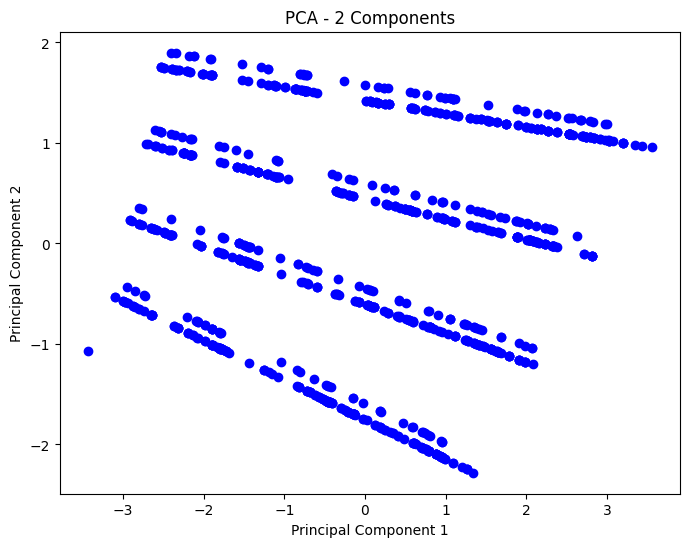

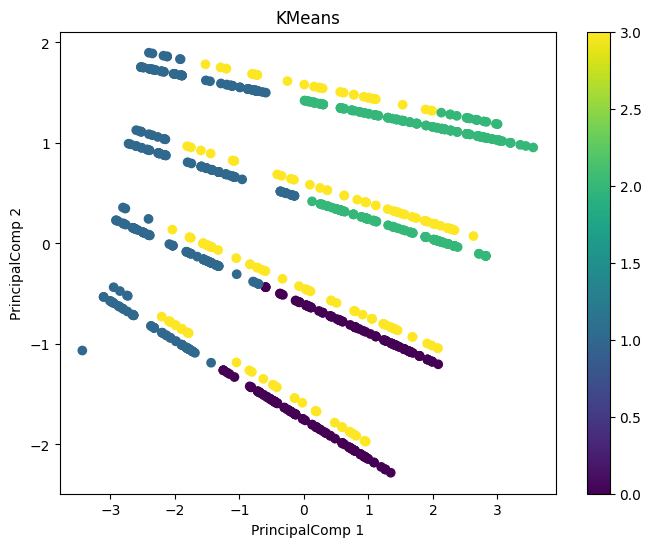

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', label='Data Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Components')
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_
final_data['Cluster'] = labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', label='Clustered Data')
plt.xlabel('PrincipalComp 1')
plt.ylabel('PrincipalComp 2')
plt.title('KMeans')
plt.colorbar()
plt.show()


In [24]:
final_data

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,Cluster
0,C0001,Lawrence Carroll,0.0,2022-07-10,T00015,P054,2024-01-19 3:12:55,2.0,114.60,57.30,SoundWave Cookbook,1.0,57.30,1
1,C0001,Lawrence Carroll,0.0,2022-07-10,T00932,P022,2024-09-17 9:01:18,3.0,412.62,137.54,HomeSense Wall Art,0.0,137.54,1
2,C0001,Lawrence Carroll,0.0,2022-07-10,T00085,P096,2024-04-08 0:01:00,2.0,614.94,307.47,SoundWave Headphones,0.0,307.47,0
3,C0001,Lawrence Carroll,0.0,2022-07-10,T00445,P083,2024-05-07 3:11:44,2.0,911.44,455.72,ActiveWear Smartwatch,0.0,455.72,0
4,C0001,Lawrence Carroll,0.0,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,433.64,TechPro Headphones,0.0,433.64,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,C0200,Kelly Cross,1.0,2023-06-11,T00518,P034,2024-12-11 3:05:50,4.0,868.20,217.05,HomeSense T-Shirt,0.0,217.05,3
997,C0200,Kelly Cross,1.0,2023-06-11,T00091,P057,2024-04-27 19:06:20,1.0,239.70,239.70,ActiveWear Smartphone,0.0,239.70,3
998,C0200,Kelly Cross,1.0,2023-06-11,T00731,P061,2024-07-15 20:36:28,4.0,627.84,156.96,HomeSense Desk Lamp,0.0,156.96,3
999,C0200,Kelly Cross,1.0,2023-06-11,T00771,P048,2024-09-10 9:50:48,4.0,1665.60,416.40,TechPro Cookbook,1.0,416.40,2
